In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("Sample_1.csv")

In [3]:
data.head()

,Unnamed: 0,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,4717918,C2C,589222,0.0,2019-07-08 17:35:00.000-04:00,0,0.0,3,5,44011,76249,6,35.99,1,2019-07-06 21:30:12.000-04:00,2019-07-10,7,1,PACKAGE_THICK_ENVELOPE,4717919
1,1864327,B2C,72389,1.0,2019-01-03 23:05:00.000-05:00,1,0.0,2,5,40517,29440,10,349.99,2,2019-01-02 17:23:19.000-05:00,2019-01-07,176,1,PACKAGE_THICK_ENVELOPE,1864328
2,2268744,C2C,380983,2.0,2018-11-15 13:53:00.000-08:00,1,12.0,2,5,92154,84405,6,102.50,1,2018-11-11 18:32:16.000-08:00,2018-11-19,32,1,PACKAGE_THICK_ENVELOPE,2268745
3,6067012,B2C,6092,5.0,2018-05-04 12:38:00.000-05:00,1,10.5,2,5,54947,98045,10,18.44,1,2018-05-02 19:14:09.000-05:00,2018-05-07,0,1,PACKAGE_THICK_ENVELOPE,6067013
4,11799209,B2C,47630,5.0,2019-02-28 11:46:00.000-05:00,0,8.4,3,5,48329,01075,3,4.55,1,2019-02-23 21:14:05.000-05:00,2019-03-04,16,1,PACKAGE_THICK_ENVELOPE,11799210


In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60000 non-null  int64  
 1   b2c_c2c                    60000 non-null  object 
 2   seller_id                  60000 non-null  int64  
 3   declared_handling_days     57261 non-null  float64
 4   acceptance_scan_timestamp  60000 non-null  object 
 5   shipment_method_id         60000 non-null  int64  
 6   shipping_fee               60000 non-null  float64
 7   carrier_min_estimate       60000 non-null  int64  
 8   carrier_max_estimate       60000 non-null  int64  
 9   item_zip                   60000 non-null  object 
 10  buyer_zip                  60000 non-null  object 
 11  category_id                60000 non-null  int64  
 12  item_price                 60000 non-null  float64
 13  quantity                   60000 non-null  int

In [5]:
data2=data.dropna()

In [6]:
data2.shape

(57261, 20)

In [7]:
data2['package_size'].value_counts()

PACKAGE_THICK_ENVELOPE    48233
NONE                       4099
LETTER                     3475
LARGE_ENVELOPE              797
LARGE_PACKAGE               657
Name: package_size, dtype: int64

In [8]:
# Making the package size from str to int
 
data2['package_size'].replace(to_replace=['PACKAGE_THICK_ENVELOPE','NONE','LETTER','LARGE_ENVELOPE','LARGE_PACKAGE'],value=[5,4,3,2,1],inplace=True)

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
data['b2c_c2c'].value_counts()

B2C    42632
C2C    17368
Name: b2c_c2c, dtype: int64

In [10]:
# Making the 'b2c_c2c' from str to int

data2['b2c_c2c'].replace(to_replace=['C2C','B2C'],value=[1,2],inplace=True)

In [11]:
# filtering 'acceptance_scan_timestamp' to only date type
import datetime

data2['acceptance_scan_timestamp']= data2['acceptance_scan_timestamp'].str.split(" ").str[0]


C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
# Makeing it date object type
data2['acceptance_scan_timestamp'].head()
data2.loc[:,'acceptance_scan_timestamp']= pd.to_datetime(data2['acceptance_scan_timestamp']).dt.date

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
data2['acceptance_scan_timestamp'].dtype

dtype('O')

In [14]:
# Makeing 'payment_datetime' TO date object type
data['payment_datetime']= data['payment_datetime'].str.split(" ").str[0]


data['payment_datetime'].head()

0    2019-07-06
1    2019-01-02
2    2018-11-11
3    2018-05-02
4    2019-02-23
Name: payment_datetime, dtype: object

In [15]:
data2['payment_datetime']=data['payment_datetime']

C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data2.loc[:,'payment_datetime']= pd.to_datetime(data2['payment_datetime']).dt.date

In [17]:
# CALCULATE DAYS FROM MINUSING TO 'payment_datetime' FROM 'acceptance_scan_timestamp'
data2['del_to_pay'] = (data2['acceptance_scan_timestamp'] - data2['payment_datetime']).dt.days

C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data3=data2

In [19]:
data3.loc[:,'delivery_date']= pd.to_datetime(data3['delivery_date']).dt.date

In [20]:
# CALCULATE DAYS FROM MINUSING TO 'payment_datetime' FROM ''delivery_date'
data3['pay_to_del'] = (data3['delivery_date'] - data3['payment_datetime']).dt.days

C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
pip install pgeocode


Note: you may need to restart the kernel to use updated packages.


In [22]:
# GET DISTANCE FROM ZIP CODES
import pgeocode
def get_distance_zip(x, y):
    usa_zipcodes = pgeocode.GeoDistance('us')
    distance_in_kms = usa_zipcodes.query_postal_code(x.values, y.values)
    return distance_in_kms

data3['Distance'] = get_distance_zip(data3['item_zip'], data3['buyer_zip'])

C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
data3['Distance'].head()

0    1621.567281
1     687.747533
2    1057.383292
3    2567.202433
4     887.293984
Name: Distance, dtype: float64

In [24]:
f1df= data3

In [25]:
f1df['pay_to_acctt']= f1df['del_to_pay']
f1df['del_days']= f1df['pay_to_del']


C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prate\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
final_df =f1df

In [27]:
# DROP FEATURES THATS ARE USED IN DIFFERENT WAYS
final_df = final_df.drop(['seller_id', 'acceptance_scan_timestamp','item_zip','record_number'], axis=1)

In [28]:
final_df.head()

,Unnamed: 0,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,buyer_zip,category_id,item_price,...,payment_datetime,delivery_date,weight,weight_units,package_size,del_to_pay,pay_to_del,Distance,pay_to_acctt,del_days
0,4717918,1,0.0,0,0.0,3,5,76249,6,35.99,...,2019-07-06,2019-07-10,7,1,5,2,4,1621.567281,2,4
1,1864327,2,1.0,1,0.0,2,5,29440,10,349.99,...,2019-01-02,2019-01-07,176,1,5,1,5,687.747533,1,5
2,2268744,1,2.0,1,12.0,2,5,84405,6,102.50,...,2018-11-11,2018-11-19,32,1,5,4,8,1057.383292,4,8
3,6067012,2,5.0,1,10.5,2,5,98045,10,18.44,...,2018-05-02,2018-05-07,0,1,5,2,5,2567.202433,2,5
4,11799209,2,5.0,0,8.4,3,5,01075,3,4.55,...,2019-02-23,2019-03-04,16,1,5,5,9,887.293984,5,9


In [29]:

final_df = final_df.drop(['del_to_pay','pay_to_del'], axis=1)


In [30]:
final_df = final_df.drop(['Unnamed: 0','buyer_zip'], axis=1)

In [31]:
# CLEAN 'np.nan, np.inf, -np.inf' FROM DATA
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
clean_dataset(final_df)
#final_df=final_df.drop(['level_0','index'], axis=1)
final_df.head()

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,Distance,pay_to_acctt,del_days
0,1,0.0,0,0.0,3,5,6,35.99,1,2019-07-06,2019-07-10,7,1,5,1621.567281,2,4
1,2,1.0,1,0.0,2,5,10,349.99,2,2019-01-02,2019-01-07,176,1,5,687.747533,1,5
2,1,2.0,1,12.0,2,5,6,102.50,1,2018-11-11,2018-11-19,32,1,5,1057.383292,4,8
3,2,5.0,1,10.5,2,5,10,18.44,1,2018-05-02,2018-05-07,0,1,5,2567.202433,2,5
4,2,5.0,0,8.4,3,5,3,4.55,1,2019-02-23,2019-03-04,16,1,5,887.293984,5,9


In [32]:
final_df.reset_index(drop=True,inplace=True)
final_df.shape 
refined_data =final_df
final_df = final_df.drop(['payment_datetime','delivery_date'], axis=1)
final_df.head()

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,weight,weight_units,package_size,Distance,pay_to_acctt,del_days
0,1,0.0,0,0.0,3,5,6,35.99,1,7,1,5,1621.567281,2,4
1,2,1.0,1,0.0,2,5,10,349.99,2,176,1,5,687.747533,1,5
2,1,2.0,1,12.0,2,5,6,102.50,1,32,1,5,1057.383292,4,8
3,2,5.0,1,10.5,2,5,10,18.44,1,0,1,5,2567.202433,2,5
4,2,5.0,0,8.4,3,5,3,4.55,1,16,1,5,887.293984,5,9


In [33]:
# SAVE A INSTANCE OF REFINED DATA
refined_data1=refined_data
refined_data1.head()

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,Distance,pay_to_acctt,del_days
0,1,0.0,0,0.0,3,5,6,35.99,1,2019-07-06,2019-07-10,7,1,5,1621.567281,2,4
1,2,1.0,1,0.0,2,5,10,349.99,2,2019-01-02,2019-01-07,176,1,5,687.747533,1,5
2,1,2.0,1,12.0,2,5,6,102.50,1,2018-11-11,2018-11-19,32,1,5,1057.383292,4,8
3,2,5.0,1,10.5,2,5,10,18.44,1,2018-05-02,2018-05-07,0,1,5,2567.202433,2,5
4,2,5.0,0,8.4,3,5,3,4.55,1,2019-02-23,2019-03-04,16,1,5,887.293984,5,9


In [34]:
from sklearn import linear_model

In [35]:
# 'del_days' IS DELIVARY DAYS FROM THE PAYMENT DAYS IS OUR Y
# WE WILL CALCALCULTAE DELIVARY DATE FROM IT
x = final_df.drop('del_days', axis=1)

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55641 entries, 0 to 55640
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b2c_c2c                 55641 non-null  int64  
 1   declared_handling_days  55641 non-null  float64
 2   shipment_method_id      55641 non-null  int64  
 3   shipping_fee            55641 non-null  float64
 4   carrier_min_estimate    55641 non-null  int64  
 5   carrier_max_estimate    55641 non-null  int64  
 6   category_id             55641 non-null  int64  
 7   item_price              55641 non-null  float64
 8   quantity                55641 non-null  int64  
 9   weight                  55641 non-null  int64  
 10  weight_units            55641 non-null  int64  
 11  package_size            55641 non-null  int64  
 12  Distance                55641 non-null  float64
 13  pay_to_acctt            55641 non-null  int64  
dtypes: float64(4), int64(10)
memory usage:

In [37]:
y = final_df.del_days

In [38]:
# StandardScaler IS FOR SCALING THE DATA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [39]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.1, random_state = 0)

In [40]:
lr=make_pipeline(StandardScaler(), linear_model.LinearRegression())

In [41]:
lr.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [42]:
xtrain

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,weight,weight_units,package_size,Distance,pay_to_acctt
786,2,3.0,0,3.74,3,5,8,388.74,1,2,1,5,624.035306,1
11673,2,0.0,0,0.00,3,5,0,29.04,1,0,1,4,2561.405829,1
13790,2,0.0,0,0.00,3,5,0,11.95,1,2,1,5,991.448705,1
35542,1,3.0,2,0.00,2,9,1,39.00,1,32,1,2,241.759211,1
36754,2,2.0,0,15.75,3,5,4,207.50,1,0,1,5,1466.175760,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,2,1.0,0,0.00,3,5,26,16.71,1,5,1,5,3950.528502,2
52416,1,1.0,0,2.96,3,5,17,6.75,1,2,1,5,3164.260111,2
42613,1,2.0,0,4.57,3,5,0,2.50,1,5,1,5,2163.550382,2
43567,1,1.0,0,0.00,3,5,4,18.95,1,0,1,5,2070.799236,4


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# data analysis and wrangling

svc=SVR() 
svc.fit(xtrain,ytrain)
svc_ytest_predict = svc.predict(xtest)
# print('SVM regressor - Linear Accuracy: {:.2f}'.format(svc.score(xtest,ytest)*100))
# print('SVM regressor - Linear rmse: ',np.sqrt(mean_squared_error(svc_ytest_predict , ytest  )))

In [ ]:
svc_predict = svc.predict(xtest).round(0).astype('int64')
svc_score = r2_score(ytest, svc_predict)

In [43]:
# R2_SCORE FOR CALCULATING THE ACCURACY OF THE MODEL
from sklearn.metrics import r2_score 

In [50]:
predict = model.predict(xtest).round(0).astype('int64')

In [51]:
score = r2_score(ytest, predict)
score

0.7749097298289285

In [46]:
predict[0:7]

array([7, 7, 6, 3, 6, 3, 5])

In [47]:
ytest.head(6)

20536     7
41240    10
3132      6
53253     4
1417      4
28574     6
Name: del_days, dtype: int64

In [52]:
import matplotlib.pyplot as plt

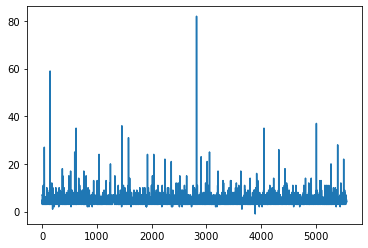

In [53]:
plt.plot(predict)



In [54]:
ytestnp=np.array(ytest)

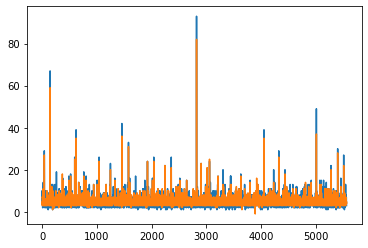

In [57]:
plt.plot(ytestnp)
plt.plot(predict)

In [58]:
testdf=pd.read_csv('Sample_1_test.csv')

testdf=testdf.drop(['delivery_date'], axis=1)

testdf.shape

(15000, 19)

In [59]:
testdf=clean_dataset(testdf)
testdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14921 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 14921 non-null  int64  
 1   b2c_c2c                    14921 non-null  object 
 2   seller_id                  14921 non-null  int64  
 3   declared_handling_days     14921 non-null  float64
 4   acceptance_scan_timestamp  14921 non-null  object 
 5   shipment_method_id         14921 non-null  int64  
 6   shipping_fee               14921 non-null  float64
 7   carrier_min_estimate       14921 non-null  int64  
 8   carrier_max_estimate       14921 non-null  int64  
 9   item_zip                   14921 non-null  object 
 10  buyer_zip                  14921 non-null  object 
 11  category_id                14921 non-null  int64  
 12  item_price                 14921 non-null  float64
 13  quantity                   14921 non-null  int

In [60]:
# SAME AS TRAIN DATA
testdf['package_size'].replace(to_replace=['PACKAGE_THICK_ENVELOPE','NONE','LETTER','LARGE_ENVELOPE','LARGE_PACKAGE'],value=[5,4,3,2,1],inplace=True)

In [61]:
testdf['b2c_c2c'].replace(to_replace=['C2C','B2C'],value=[1,2],inplace=True)

In [62]:
testdf['acceptance_scan_timestamp']= testdf['acceptance_scan_timestamp'].str.split(" ").str[0]

In [63]:
testdf.loc[:,'acceptance_scan_timestamp']= pd.to_datetime(testdf['acceptance_scan_timestamp']).dt.date

In [64]:
testdf['payment_datetime']= testdf['payment_datetime'].str.split(" ").str[0]

In [65]:
testdf.loc[:,'payment_datetime']= pd.to_datetime(testdf['payment_datetime']).dt.date

In [66]:
testdf['Distance'] = get_distance_zip(testdf['item_zip'], testdf['buyer_zip'])

In [67]:
testdf['pay_to_acctt'] = (testdf['acceptance_scan_timestamp'] - testdf['payment_datetime']).dt.days

In [558]:
#test_payment_date=testdf.payment_datetime

In [68]:
testdf = testdf.drop(['seller_id', 'acceptance_scan_timestamp','item_zip'], axis=1)

In [69]:
testdf = testdf.drop(['buyer_zip', 'Unnamed: 0'], axis=1)
testdf.head()

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,payment_datetime,weight,weight_units,package_size,record_number,Distance,pay_to_acctt
0,2,2.0,4,0.00,2,9,11,8.45,1,2019-12-02,0,1,3,16377733,2531.894475,0
1,2,1.0,1,7.85,2,5,4,5.37,1,2019-11-24,32,1,5,16129562,71.647965,2
2,1,3.0,0,3.75,3,5,0,8.00,1,2019-12-09,4,1,5,15452689,1949.842421,2
3,2,1.0,0,0.00,3,5,7,6.25,1,2019-11-23,0,1,4,16932805,3762.527510,2
4,1,2.0,1,18.00,2,5,22,50.00,1,2019-12-13,32,1,5,16374203,1420.770599,3


In [70]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14921 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b2c_c2c                 14921 non-null  int64  
 1   declared_handling_days  14921 non-null  float64
 2   shipment_method_id      14921 non-null  int64  
 3   shipping_fee            14921 non-null  float64
 4   carrier_min_estimate    14921 non-null  int64  
 5   carrier_max_estimate    14921 non-null  int64  
 6   category_id             14921 non-null  int64  
 7   item_price              14921 non-null  float64
 8   quantity                14921 non-null  int64  
 9   payment_datetime        14921 non-null  object 
 10  weight                  14921 non-null  int64  
 11  weight_units            14921 non-null  int64  
 12  package_size            14921 non-null  int64  
 13  record_number           14921 non-null  int64  
 14  Distance                14792 non-null

In [71]:
clean_dataset(testdf)

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,payment_datetime,weight,weight_units,package_size,record_number,Distance,pay_to_acctt
0,2,2.0,4,0.00,2,9,11,8.45,1,2019-12-02,0,1,3,16377733,2531.894475,0
1,2,1.0,1,7.85,2,5,4,5.37,1,2019-11-24,32,1,5,16129562,71.647965,2
2,1,3.0,0,3.75,3,5,0,8.00,1,2019-12-09,4,1,5,15452689,1949.842421,2
3,2,1.0,0,0.00,3,5,7,6.25,1,2019-11-23,0,1,4,16932805,3762.527510,2
4,1,2.0,1,18.00,2,5,22,50.00,1,2019-12-13,32,1,5,16374203,1420.770599,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2,0.0,0,0.00,3,5,1,19.98,1,2019-11-30,3,1,5,16453153,2642.644297,2
14996,2,1.0,1,9.30,2,5,3,51.09,1,2019-12-08,16,1,5,17047025,3890.510340,3
14997,1,1.0,0,3.75,3,5,7,2.49,1,2019-12-06,0,1,5,17335135,287.544773,1
14998,2,1.0,0,3.40,3,5,16,1.94,1,2019-11-09,0,1,5,17256382,4287.725685,3


In [72]:
testdf.reset_index(drop=True,inplace=True)


In [73]:
test_record_number=testdf.record_number
test_payment_date=testdf.payment_datetime
testdf = testdf.drop(['payment_datetime','record_number'], axis=1)


In [74]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14792 entries, 0 to 14791
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   b2c_c2c                 14792 non-null  int64  
 1   declared_handling_days  14792 non-null  float64
 2   shipment_method_id      14792 non-null  int64  
 3   shipping_fee            14792 non-null  float64
 4   carrier_min_estimate    14792 non-null  int64  
 5   carrier_max_estimate    14792 non-null  int64  
 6   category_id             14792 non-null  int64  
 7   item_price              14792 non-null  float64
 8   quantity                14792 non-null  int64  
 9   weight                  14792 non-null  int64  
 10  weight_units            14792 non-null  int64  
 11  package_size            14792 non-null  int64  
 12  Distance                14792 non-null  float64
 13  pay_to_acctt            14792 non-null  int64  
dtypes: float64(4), int64(10)
memory usage:

In [75]:

testdfpredict = model.predict(testdf).round(0)

In [76]:
testdfpredict[1:7]

array([4., 5., 5., 6., 4., 5.])

In [77]:
npr= pd.Series(testdfpredict)
npr[279]

6.0

In [78]:
# calculating delivery date

test_deli_date=pd.Series([])
for i in range(len(test_payment_date)):
    
    nextdate = test_payment_date[i] + datetime.timedelta(npr[i])
   
    nextdate= pd.Series([nextdate])
    test_deli_date=test_deli_date.append(nextdate,ignore_index=True)

<ipython-input-78-d78ec0fdbbef>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test_deli_date=pd.Series([])


In [83]:
# This is the delivery date of first 10 data of the test data
test_deli_date[0:10]

0    2019-12-07
1    2019-11-28
2    2019-12-14
3    2019-11-28
4    2019-12-19
5    2019-12-06
6    2019-12-24
7    2019-11-28
8    2019-12-19
9    2019-12-13
dtype: object

In [84]:
ref_test_data=testdf

In [85]:
ref_test_data['record_number']=test_record_number
ref_test_data['payment_date']=test_payment_date
ref_test_data['delivery_date']=test_deli_date



In [86]:
ref_test_data1=ref_test_data
ref_test_data1.head()

,b2c_c2c,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,weight,weight_units,package_size,Distance,pay_to_acctt,record_number,payment_date,delivery_date
0,2,2.0,4,0.00,2,9,11,8.45,1,0,1,3,2531.894475,0,16377733,2019-12-02,2019-12-07
1,2,1.0,1,7.85,2,5,4,5.37,1,32,1,5,71.647965,2,16129562,2019-11-24,2019-11-28
2,1,3.0,0,3.75,3,5,0,8.00,1,4,1,5,1949.842421,2,15452689,2019-12-09,2019-12-14
3,2,1.0,0,0.00,3,5,7,6.25,1,0,1,4,3762.527510,2,16932805,2019-11-23,2019-11-28
4,1,2.0,1,18.00,2,5,22,50.00,1,32,1,5,1420.770599,3,16374203,2019-12-13,2019-12-19


In [87]:
ref_test_data1.to_csv('test_data_w_result.csv', encoding='utf-8')

In [921]:
refined_data1.to_csv('refined_train_data.csv', encoding='utf-8')